#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 213070015, 213079003
4. Write your names here: Satyabrata Sahu, Akella Venkata Surya Srinidhi
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**



#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [120]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [121]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    """
      X : data matrix which is to normalised  
          norm_X : normalized data matrix

         A number is normalised with zero mean and unit variance as follows:
                  Z = (X - μ)/σ 
        where,  μ = Mean(X)
                σ = Standard Deviation(X)  
    """
  
    norm_X = (X - X.mean(axis=0))/X.std(axis=0)

    # X.mean(axis=0) computes the mean along rows i.e returns a row vector of means of each column of X
    # X.std(axis=0) computes the standard deviation along rows i.e returns a row vector of std_dev of each column of X
    return norm_X

    #raise NotImplementedError()

In [122]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [123]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    # YOUR CODE HERE
    # we need to stack a column of 1's to the datamatrix X
    # np.ones((X.shape[0],1)) creates a column vector of 1's with number of rows = number of rows in X
    # np.concatenate(X1, X2, axis=1) stacks X2 to X1 as columns
    
    X1 = np.concatenate((X,np.ones((X.shape[0],1))),axis=1) # creating X stacked with column of 1's i.e. [X 1] matrix/vector and storing as X1
    y = np.dot(X1,w)                                        # np.dot() performs the element wise multiplication of the vectors/matrices given    
    return y 
    
    #raise NotImplementedError()


In [124]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [125]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    # YOUR CODE HERE
    """ 
    Mean squared error (MSE) is the average squared difference between the observed and predicted values. 
    It is given by the formula:
                  MSE  = (Σ(yi -ŷi)^2)/n
    where, yi is the ith observed value.
           ŷi is the corresponding predicted value.
           n = the number of observations.
           (yi -ŷi)^2 = squared difference between yi, ŷi
    """
    y = Prediction(X,w)                         # finding the predicted values
    m = y.size                                  # finding the number of observations (y.size gives the numbers of elements in y)
    mse_loss = (1/m)*(np.sum(np.square(t-y)))   # t--> observed values and computing the mse loss as per formula
    return mse_loss
    
    #raise NotImplementedError()

In [126]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [127]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    """ 
        Mean absolute error (MAE) is the average absolute difference between the observed and predicted values. 
        It is given by the formula:
                      MAE  = (Σ|(yi -ŷi)|)/n
        where, yi is the ith observed value.
               ŷi is the corresponding predicted value.
               n = the number of observations.
              |(yi -ŷi)| =  absolute difference between yi, ŷi
    """
    y = Prediction(X,w)                   # finding the predicted values
    m = y.size                            # finding the number of observations (y.size gives the numbers of elements in y)
    mae_loss = (1/m)*np.sum(np.abs(t-y))  # t--> observed values and computing the mae loss as per formula
    return mae_loss
    
    #raise NotImplementedError()

In [128]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [129]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE

    """ 
    A linear regression model that implements L2 norm for regularisation is called Ridge Regression. 
    The cost function with L2 regularization is given as:
          Cost = MSE Loss + λ(L2 Norm of w)
    where MSE Loss = (Σ(yi -ŷi)^2)/n is the mse loss between the observed and predicted values
          L2 Norm of w =  √(Σ(wi^2)) = ||w|| i.e square root of squared value of weights(wi) --> L2 regularization element.
          λ = Regularization parameter

    """    
    mse = MSE_Loss (X, t, w, lamda =0)          # computing the mse loss by calling the MSE_Loss() function defined previously
    l2norm = np.sqrt(np.sum(np.square(w[:-1]))) # computing the l2-norm of weights excluding the bias term(last term of w-->w[-1] is bias)
    l2_loss = mse + lamda*l2norm                # finding the net cost 
    return l2_loss
    
    #raise NotImplementedError()

In [130]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [131]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE
    """ 
    A linear regression model that implements L1 norm for regularisation is called Lasso Regression. 
    The cost function with L2 regularization is given as:
          Cost = MSE Loss + λ(L1 Norm of w)
    where MSE Loss = (Σ(yi -ŷi)^2)/n is the mse loss between the observed and predicted values
          L1 Norm of w =  Σ|wi| i.e sum of absolute value of weights(wi) --> L1 regularization element.
          λ = Regularization parameter

    """  
    mse = MSE_Loss (X, t, w, lamda =0) # computing the mse loss by calling the MSE_Loss() function defined previously
    l1norm = np.sum(np.abs(w[:-1]))    # computing the l1-norm of weights excluding the bias term(last term of w-->w[-1] is bias)
    l1_loss = mse + lamda*l1norm       # finding the net cost 
    return l1_loss
    
    #raise NotImplementedError()

In [132]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [133]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    # YOUR CODE HERE
    """  
      Normalizing the RMSE facilitates the comparison between datasets or models with different scales.
      This is achieved by the following formula:
              NRMSE = RMSE/σ  = (√(MSE))/ σ
          where, we are normalizing by σ
                  σ = Standard Deviation
                RMSE = Root Mean Squared Error
    """
    mse = MSE_Loss (X, t, w, lamda =0)          # computing the mse loss by calling the MSE_Loss() function defined previously
    nrmse_loss = np.sqrt(mse)/(np.sum(t.std())) # np.sum(t.std()) gives the std_dev of target variable and np.sqrt(mse) gives the rmse
    return nrmse_loss
    
    #raise NotImplementedError()

In [134]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [135]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    """ 
    The gradient is nothing but derivative. Since our parameters are w(weights),b(bias), we take the derivative w.r.t to w,b
    The MSE gradient is obtained by finding the derivative of the mse cost function w.r.t w,b
        Mse Cost function MSE  = (Σ(ŷi-yi)^2)/n 
        where ŷi = (wi)(xi) + b
      --> Gradient w.r.t w is d(MSE)/dw and is given by:
            d(MSE)/dw = d((Σ(ŷi-yi)^2)/n)/dw = (2/n)*(Σ(ŷi-yi)*xi) = (2/n)*(Σ(errori*xi) 
        where errori = error between ith predicted and observed values = ŷi-yi
      --> Gradient w.r.t b is d(MSE)/db and is given by:
            d(MSE)/db = d((Σ(ŷi-yi)^2)/n)/db = (2/n)*(Σ(ŷi-yi)) = (2/n)* Σ(errori)  = (2/n)* sum of errors

    """
    y_estimated = Prediction(X, w)          # finds the predicted value by calling Prediction() the function defined previously
    error = (y_estimated - t)               # find error between predicted and observed values
    
    # here w contains the weights included with bias term.
    # so here find the gradient vector w.r.t w and then replace the last element with gradient component w.r.t bias since w[-1] is bias 
    
    gradient = (2 / X.shape[0]) * np.dot(X.T,error)                      # finding gradient vector w.r.t w
    gradient = np.insert(gradient,X.shape[1],(2/X.shape[0])*error.sum()) # replacing the last term with grad w.r.t b
    return gradient
    
    #raise NotImplementedError()

In [136]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [137]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    """ 
    The MAE gradient is obtained by finding the derivative of the mae cost function w.r.t w,b
        Mae Cost function MAE  = (Σ|(yi -ŷi)|)/n
        where ŷi = (wi)(xi)+b
      --> Gradient w.r.t w is d(MAE)/dw and is given by:
            d(MAE)/dw = d((Σ|(yi -ŷi)|)/n)/dw =  (1/n)* Σ(yi -ŷi/|yi -ŷi|)*xi = (1/n)* Σ(errori/abs(errori)*xi)   (Since d(|x|)/dx = x/|x|)
        where errori = error between ith predicted and observed values = ŷi-yi
      --> Gradient w.r.t b is d(MAE)/db and is given by:
            d(MAE)/db = d((Σ|(yi -ŷi)|)/n)/db = (1/n)*Σ(yi -ŷi/|yi -ŷi|) = (1/n)* Σ(errori/abs(errori)) 

    """   
    y_estimate=Prediction(X,w)               # finds the predicted value by calling Prediction() the function defined previously
    error = (y_estimate - t)                 # find error between predicted and observed values
    
    # here w contains the weights included with bias term.
    # so here find the gradient vector w.r.t w and then replace the last element with gradient component w.r.t bias since w[-1] is bias 

    gradient = (1 / X.shape[0]) * np.dot((X).T,(error/abs(error)))                  # finding gradient vector w.r.t w
    gradient=np.insert(gradient,X.shape[1],(1/X.shape[0])*(error/abs(error)).sum()) # replacing the last term with grad w.r.t b
    return gradient
    
    #raise NotImplementedError()

In [138]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [139]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    """  
    The L2 gradient is obtained by finding the derivative of the l2loss cost function w.r.t w,b
        L2 Cost function L2_Loss  = MSE Loss + λ(L2 Norm of w) 
        where ŷi = (wi)(xi)+b
      --> Gradient w.r.t w is d(L2_Loss)/dw and is given by:
            d(L2_Loss)/dw =  d(MSE)/dw + λd(L2 Norm of w)/dw

          --> d(MSE)/dw = d((Σ(ŷi-yi)^2)/n)/dw = (2/n)*(Σ(ŷi-yi)*xi) = (2/n)*(Σ(errori*xi) 
                where errori = error between ith predicted and observed values = ŷi-yi
          --> d(L2 Norm of w)/dw = d(√(Σ(wi^2)))/dw = (1/√(Σ(wi^2)))* wi

      Thus, d(L2_Loss)/dw  = (2/n)*(Σ(errori*xi) + λ((1/√(Σ(wi^2)))* wi)
      --> Gradient w.r.t b is d(L2_Loss)/db and is given by:
          d(L2_Loss)/db =  d(MSE)/db + λd(L2 Norm of w)/db  

          --> d(MSE)/db = d((Σ(ŷi-yi)^2)/n)/db = (2/n)*(Σ(ŷi-yi)) = (2/n)* Σ(errori)  = (2/n)* sum of errors
          --> d(L2 Norm of w)/db = d(√(Σ(wi^2)))/db  = 0
      Thus,  d(L2_Loss)/db =  (2/n)* sum of errors

    """
    y_estimated=Prediction(X, w)                   # finds the predicted value by calling Prediction() the function defined previously
    error = (y_estimated - t)                      # find error between predicted and observed values
    
    # here w contains the weights included with bias term.
    # so here find the gradient vector w.r.t w and then replace the last element with gradient component w.r.t bias since w[-1] is bias     
    
    gradient = (2 / X.shape[0]) * np.dot(X.T,error)+ lamda*w[:-1]/np.sqrt(np.sum(np.square(w[:-1]))) # finding gradient vector w.r.t w 
    gradient=np.insert(gradient,X.shape[1],(2/X.shape[0])*error.sum())                      # replacing the last term with grad w.r.t b
    return gradient
    
    #raise NotImplementedError()

In [140]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [141]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    """  
    The L1 gradient is obtained by finding the derivative of the l1loss cost function w.r.t w,b
        L1 Cost function L1_Loss  = MSE Loss + λ(L1 Norm of w) 
        where ŷi = (wi)(xi)+b
      --> Gradient w.r.t w is d(L1_Loss)/dw and is given by:
            d(L1_Loss)/dw =  d(MSE)/dw + λd(L1 Norm of w)/dw

          --> d(MSE)/dw = d((Σ(ŷi-yi)^2)/n)/dw = (2/n)*(Σ(ŷi-yi)*xi) = (2/n)*(Σ(errori*xi) 
                where errori = error between ith predicted and observed values = ŷi-yi
          --> d(L1 Norm of w)/dw = d(Σ|wi|)/dw = wi/|wi|

      Thus, d(L1_Loss)/dw  = (2/n)*(Σ(errori*xi) + λ(wi/|wi|)
      --> Gradient w.r.t b is d(L2_Loss)/db and is given by:
          d(L1_Loss)/db =  d(MSE)/db + λd(L1 Norm of w)/db  

          --> d(MSE)/db = d((Σ(ŷi-yi)^2)/n)/db = (2/n)*(Σ(ŷi-yi)) = (2/n)* Σ(errori)  = (2/n)* sum of errors
          --> d(L1 Norm of w)/db = d(Σ|wi|)/db  = 0
      Thus,  d(L1_Loss)/db =  (2/n)* sum of errors

    """   
    y_estimated=Prediction(X, w)                   # finds the predicted value by calling Prediction() the function defined previously
    error = (y_estimated - t)                      # find error between predicted and observed values

    # here w contains the weights included with bias term.
    # so here find the gradient vector w.r.t w and then replace the last element with gradient component w.r.t bias since w[-1] is bias
        
    gradient = (2 / X.shape[0]) * np.dot(X.T,error) + lamda*w[:-1]/abs(w[:-1]) # finding gradient vector w.r.t w
    gradient=np.insert(gradient,X.shape[1],(2/X.shape[0])*error.sum())         # replacing the last term with grad w.r.t b
    return gradient
    
    #raise NotImplementedError()

In [142]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [143]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    """
    The Gradient Descent algorithm  is an iterative first-order algorithm of optimisation to find the local minima.
    It helps in minimizing the cost/loss function. It works in the following way:
      1) initialize the weights
      2) calculate gradient of cost function w.r.t weights
      3) scale with learning rate(η) and subtract it with the previous weights and update the weights
         i.e w--> w - (η * d(cost)/dw)
         The subtraction is done to move in opposite direction ( since we need to minimise)

      4) Repeat the steps 2 and 3 over each iteration until one of the criteria is met:
         a) either the difference between the cost calculated with previous weights and the cost calculated with updated 
            weights is less than epsilon(ε)
         b) the maximum of iterations are reached.
    """

    loss1 = 1e10  # Initialising the cost
    # iterating over each iteration upto the max number of iterations denoted by "max_iter"
    for _ in range(max_iter):
      # updating the weights by using the formula and storing as new weights(w1) where w are previous weights, lr is learning rate
      w1 = w - (lr *gradfunc(X, t, w, lamda=lamda))  
      
      loss2 = lossfunc(X, t, w1, lamda=lamda) # calculate the new cost with the updated weights
      
      if np.abs(loss2-loss1) < epsilon: # breaking condition where the difference between previous and new cost is less than ε
        break
      
      w = w1   # setting the current weights as previous weights and repeating the process
    
    w_final = w1      # saving the optimised weights 
    train_loss_final = lossfunc(X,t,w_final,lamda=lamda)                  # finding the training loss with the optimised weights  
    validation_loss_final = lossfunc(X_val, t_val, w_final,lamda=lamda)   # finding the validation loss with the optimised weights  
    validation_NRMSE = NRMSE_Metric (X_val, t_val, w_final)               # finding the validation NRMSE loss with the optimised weights
   
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this
    
    #raise NotImplementedError()
    

In [144]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [145]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
    """
    The weights for L2 Regularisation Linear Regression is obtained by finding the Pseudo-inverse Method.
    They are computed by using the below formula:
           w = (X'X + lambda I)^(-1) X't
        where X : data matrix with m sample points and n features(including the column of 1's) i.e mxn matrix
              X': transpose of X i.e of order nxm matrix
              I : identity matrix of order same as X'X (i.e nxn) in order to obey addition
          lambda: Regularisation Parameter
              t : the target variable of order mx1 
              w : weights vector of order nx1
    """
    X1 = np.concatenate((X,np.ones((X.shape[0],1))),axis=1) # creating X stacked with column of 1's i.e. [X 1] matrix/vector and storing as X1
    shape=np.dot(X1.T,X1).shape                             # getting the shape of X'X
    w=np.dot(np.dot(np.linalg.inv(np.dot(X1.T,X1)+lamda*np.identity(shape[0])),X1.T),t) # computing w using formula 
    return w
    
    #raise NotImplementedError()

In [146]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


## Exploratory Data Analysis

In [147]:
# reading the dataset using Pandas library
train_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv")

> read_csv is an important Pandas function to read csv files and do operations on it.

> - Generally opening a csv file through this function is easy. 

> - We need to specify the path of the csv file in our local directory. 

> - The main advantage of this function is, the csv file can be read not only locally but also using an URL.


In [148]:
# checking the dataframe
train_df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,23.9,19.8,82.235489,89.673126,20.718329,16.868849,14.908830,86.993173,0.759186,0.862202,0.898900,0.723556,0.348464,2.153618,5.217196,1.139555,37.5507,127.040,26.2980,0.5721,4416.057129,21.0
6078,24.4,19.7,79.676888,90.329170,20.957463,17.063541,13.844681,95.444412,0.787284,0.901921,0.920533,0.667988,0.297791,1.894275,5.737044,1.002951,37.5102,127.086,21.9668,0.1332,4401.705566,21.4
6079,24.8,19.9,82.331352,90.905838,20.804890,16.927768,14.502989,85.178889,0.769457,0.949824,0.966691,0.811649,0.413629,1.465975,4.861343,0.750402,37.5372,126.891,15.5876,0.1554,4403.272949,21.2
6080,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,0.947244,0.955192,0.784297,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672,21.1


In [149]:
# checking the number of rows and columns present in our dataframe
train_df.shape

(6082, 22)

> Clearly our dataframe contains 6082 rows and 22 columns.

In [150]:
# checking a few number of rows (say top 10 rows)
train_df.head(10)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
5,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5
6,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,0.0,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9
7,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,0.0,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1
8,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,0.0,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3
9,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,0.0,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5


> The head() returns the first n rows for the object based on position.

> The default value is 5 rows 
``` python
train_df.head() # prints the top 5 rows of the dataframe
```
``` python
train_df.head(15) # prints the top 15 rows of the dataframe
```

In [151]:
# checking whether there are any missing values or NaN values in our dataframe
train_df.isna().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

> Clearly there are no null entries and all columns are numerical.

In [152]:
train_df.corr() # gives correlation matrix containing correlation with each feature

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
Present_Tmax,1.000000,0.606319,-0.233283,-0.316946,0.566111,0.627311,-0.115967,0.135255,-0.297644,-0.205192,-0.144933,-0.151439,-0.100500,-0.083082,-0.128527,-0.119064,-0.055243,0.014020,-0.187750,-0.104004,-0.115116,0.630554
Present_Tmin,0.606319,1.000000,0.112085,-0.001920,0.427599,0.760888,-0.022108,-0.016808,0.127327,0.114282,-0.002312,-0.054973,0.161099,0.089884,-0.056006,-0.065215,-0.084226,-0.043032,-0.253696,-0.145383,-0.036575,0.453867
LDAPS_RHmin,-0.233283,0.112085,1.000000,0.578051,-0.615629,0.055063,0.269429,-0.069237,0.608409,0.747947,0.679387,0.494305,0.223888,0.397047,0.265498,0.186924,0.082404,-0.077744,0.096507,0.117950,0.218817,-0.475014
LDAPS_RHmax,-0.316946,-0.001920,0.578051,1.000000,-0.383872,-0.115767,0.105610,0.226431,0.432689,0.394598,0.217171,0.109508,0.253799,0.217076,0.146074,0.121939,0.187894,0.034671,0.171137,0.210366,0.126398,-0.317271
LDAPS_Tmax_lapse,0.566111,0.427599,-0.615629,-0.383872,1.000000,0.630476,-0.306162,0.036838,-0.429612,-0.525187,-0.552802,-0.431130,-0.085201,-0.239505,-0.213548,-0.179941,-0.043846,0.093136,-0.181324,-0.162803,-0.031529,0.838980
LDAPS_Tmin_lapse,0.627311,0.760888,0.055063,-0.115767,0.630476,1.000000,-0.137247,-0.144942,0.034456,0.058964,-0.056983,-0.105729,0.054440,0.005205,-0.096215,-0.110125,-0.097103,-0.025236,-0.200719,-0.188489,0.062440,0.594673
LDAPS_WS,-0.115967,-0.022108,0.269429,0.105610,-0.306162,-0.137247,1.000000,0.034638,0.240280,0.224433,0.204228,0.202263,0.090641,0.153703,0.130467,0.142594,0.046435,-0.056598,0.186220,0.168715,0.149729,-0.356417
LDAPS_LH,0.135255,-0.016808,-0.069237,0.226431,0.036838,-0.144942,0.034638,1.000000,-0.127444,-0.245764,-0.231924,-0.150757,-0.001632,-0.073818,0.009230,0.016224,0.127022,0.033677,0.053761,0.078657,-0.064518,0.138832
LDAPS_CC1,-0.297644,0.127327,0.608409,0.432689,-0.429612,0.034456,0.240280,-0.127444,1.000000,0.775993,0.486303,0.335873,0.425668,0.379795,0.173472,0.071560,-0.015411,-0.011321,-0.020121,-0.025884,0.257615,-0.453179
LDAPS_CC2,-0.205192,0.114282,0.747947,0.394598,-0.525187,0.058964,0.224433,-0.245764,0.775993,1.000000,0.700443,0.501838,0.274767,0.481285,0.259091,0.147137,-0.003371,-0.003564,-0.018535,-0.022289,0.198589,-0.490035


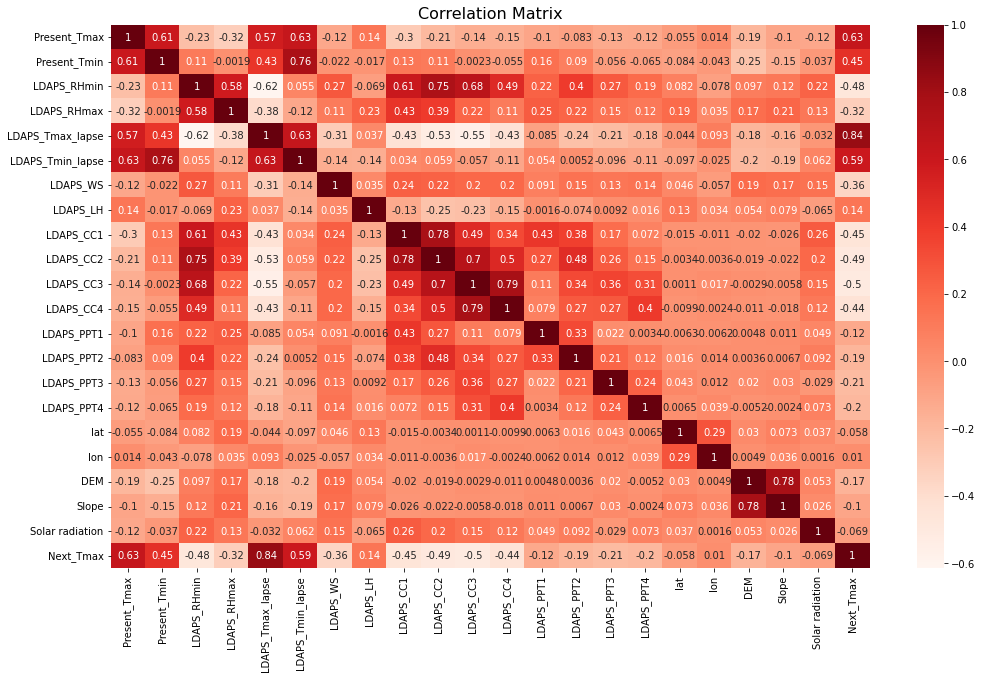

In [153]:
# let's visualize the correlation matrix using seaborn library  

import seaborn as sns                                     # import seaborn library
fig, ax = plt.subplots(figsize=(17,10))                   # setting the figure size 17x10
sns.heatmap(train_df.corr(), cmap='Reds', annot=True)     # plotting the correlation matrix
plt.title('Correlation Matrix',fontsize="16");            # giving title to the figure

> Clearly "Next_Tmax" column is strongly negative correlated with below features:
- LDAPS_RHmin
- LDAPS_CC1
- LDAPS_CC2
- LDAPS_CC3
- LDAPS_CC4
So if these features have more weights, then the "Next_Tmax"(target) has less values.<br>

> Also "Next_Tmax" column is strongly positive correlated with below features:
- LDAPS_Tmax_lapse
- Present_Tmax
- LDAPS_Tmin_lapse
- Present_Tmin
So if these features have more weights, then the "Next_Tmax"(target) has high values.

In [154]:
# let us see the attributes of each column
train_df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000
mean,29.801611,23.115291,56.018614,88.515941,29.614770,23.443802,7.139833,62.465128,0.371016,0.353386,0.303437,0.287287,0.579411,0.486801,0.252828,0.257101,37.544753,126.991630,61.872200,1.260263,5343.173788,30.303058
std,2.951021,2.401665,14.455890,7.312849,2.901865,2.310063,2.252380,33.111077,0.264576,0.259166,0.244996,0.251257,1.877036,1.751910,1.049527,1.154900,0.050415,0.079312,54.231137,1.372206,431.221299,3.097031
min,20.100000,11.300000,19.794666,58.936283,17.624954,14.720029,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000
25%,27.900000,21.500000,45.446830,84.404219,27.694146,21.925374,5.649959,37.250612,0.147001,0.137485,0.094394,0.072224,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4997.796875,28.400000
50%,29.900000,23.200000,54.158222,90.049240,29.693295,23.617270,6.571684,56.753248,0.317329,0.305546,0.246939,0.215075,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5445.730469,30.500000
75%,32.000000,24.800000,65.983959,94.024183,31.663208,25.104358,8.131577,84.760510,0.580648,0.555505,0.474692,0.486157,0.079479,0.028317,0.012658,0.000871,37.577600,127.042000,59.832400,1.767800,5729.980835,32.600000
max,37.600000,29.900000,98.524734,99.996887,37.050301,29.084492,21.857621,213.414006,0.967277,0.966997,0.983789,0.974710,23.701544,21.621661,15.841235,13.998953,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000


> The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the DataFrame. 

> Clearly we can see that each feature has different range. So before training the model, we need to normalize the data so that all the features lie in the same range. 

In [155]:
# Normalizing the dataset by calling the Normalize() function defined previously
train_norm_df = Normalize(train_df)
train_norm_df  # checking the normalized dataset

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-0.373298,-0.714209,0.154752,0.355596,-0.530924,-0.189114,-0.142492,0.211007,-0.518067,-0.576814,-0.578539,-0.622307,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,-0.007944,2.774473,1.111158,1.506702,-0.388455
1,0.711072,-0.630934,-0.259771,0.285632,0.081299,0.255927,-0.642850,-0.317950,-0.549964,-0.392084,-0.587734,-0.635047,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,0.509002,-0.315498,-0.543769,1.220113,0.063591
2,0.609412,0.076909,-0.506931,-0.621147,0.164212,0.485628,-0.444689,-1.265198,-0.611060,-0.370098,-0.405497,-0.577743,-0.308684,-0.277869,-0.240897,-0.222618,0.651523,0.836821,-0.526734,-0.724500,1.206763,0.257324
3,0.744959,0.118546,0.153652,1.089554,0.030966,-0.050919,-0.661426,0.098517,-0.584495,-0.491515,-0.580741,-0.609091,-0.308684,-0.277869,-0.240897,-0.222618,1.988424,0.382917,-0.297914,0.928824,1.191479,0.451058
4,0.541639,-0.506020,0.010756,0.224152,-0.172591,0.018475,-0.623709,1.374175,-0.830039,-0.398937,-0.508352,-0.466718,-0.308684,-0.277869,-0.240897,-0.222618,0.117953,1.807670,-0.494812,-0.550036,1.197479,0.289613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,-1.999854,-1.380414,1.813577,0.158240,-3.065767,-2.846222,3.449239,0.740781,1.467137,1.963286,2.430503,1.736342,-0.123038,0.951428,4.730100,0.764095,0.117953,0.609869,-0.655974,-0.501501,-2.149979,-3.003863
6078,-1.830421,-1.422051,1.636584,0.247951,-2.983360,-2.761942,2.976784,0.996020,1.573340,2.116541,2.518801,1.515184,-0.150035,0.803394,5.225416,0.645813,-0.685378,1.189857,-0.735839,-0.821351,-2.183260,-2.874707
6079,-1.694875,-1.338776,1.820209,0.326808,-3.035937,-2.820717,3.269056,0.685987,1.505961,2.301377,2.707204,2.086953,-0.088321,0.558918,4.391039,0.427137,-0.149824,-1.268787,-0.853469,-0.805173,-2.179625,-2.939285
6080,-1.694875,-1.338776,1.639500,0.196088,-2.960766,-2.810446,3.272242,0.705668,1.470294,2.291422,2.660271,1.978092,-0.093479,0.597789,4.823778,0.483167,-0.417601,-1.041835,-0.821974,-0.756419,-2.191242,-2.971574


## Preparing Training and Validation Datasets

In [156]:
np.random.seed(10) # sets the train, val sets i.e don't change them by running the cell each time

#splitting 80% of the dataset(normalized dataset) into training and 20% as validation datasets
train_size = 0.8 
train, val = np.split(train_norm_df.sample(frac=1), [int(train_size * len(train_norm_df))])

# splitting the independent(X) and dependent features(t)
X_train = np.array(train[train.columns[:-1]])  # input dataset for training 
t_train = np.array(train[train.columns[-1]])   # targets of training dataset
X_val = np.array(val[val.columns[:-1]])        # input dataset for validation 
t_val = np.array(val[val.columns[-1]])         # targets of validation dataset

## Building L2 Model

In [157]:
def L2_model(X_train, t_train, X_val, t_val,lamda, max_iter, epsilon, lr):
 
  w = np.ones((X_train.shape[1]+1,)) # taking weights with dimensions = features of training dataset(X_train) and initialiasing with ones

  # calling the Gradient_Descent() function defined previously to optimise the loss
  w_final, train_loss_final, val_loss_final, val_NRMSE = Gradient_Descent (X_train, X_val, t_train, t_val, w, lamda, max_iter, 
                                                                           epsilon, lr,L2_Loss,L2_Gradient)

  return w_final, train_loss_final, val_loss_final, val_NRMSE

#### Training the L2 Model

In [158]:
lamdas = list(np.logspace(-5.0, 1, num=30))  # taking 30 values of λ between 10e-05 to 10e01 in powers of 10
lrs = 0.001                                  # choosing learning rate η
max_iter = 7000                              # choosing maximum number of iterations 
epsilon = 1e-10                              # choosing the tolerance between the previous and next loss
train_loss_l2 , val_loss_l2, val_nrmse_l2,weights_l2 = [],[],[],[] # for storing the values of losses and weights for different values of λ

for lamda in lamdas: # iterating over each λ value
    # finding the values obtained after training the model
    w_final, train_loss_final, val_loss_final, val_NRMSE = L2_model(X_train, t_train, X_val, t_val,lamda, max_iter, epsilon, lrs)
    # storing the losses and weights for plotting
    train_loss_l2.append(train_loss_final)
    val_loss_l2.append(val_loss_final)
    val_nrmse_l2.append(val_NRMSE)
    weights_l2.append(w_final)
    

#### Observations and Results of Training

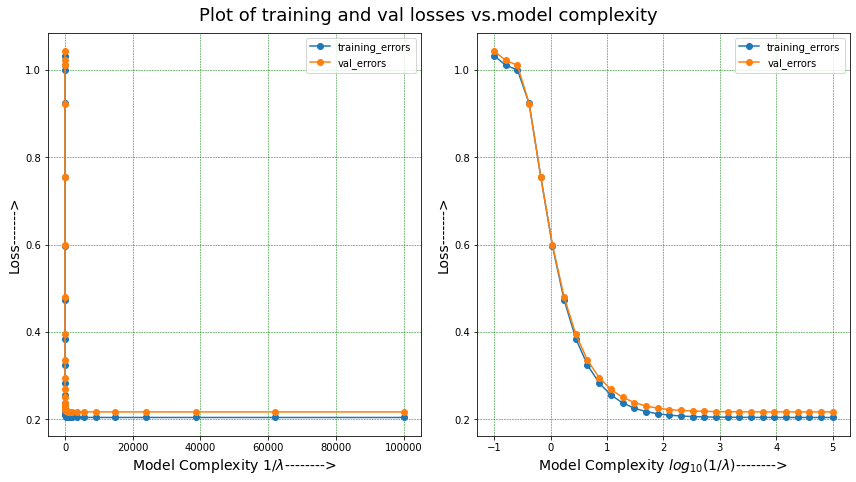

In [159]:
fig = plt.figure(figsize=(12,7)); # setting the figure size
model_complexity = [1/lamda for lamda in lamdas]  # taking the list to plot model complexity

plt.subplot(121)
  # plotting the training loss over the 1/λ values 
plt.plot(model_complexity,train_loss_l2,linestyle='solid',marker = 'o',label='training_errors')
  # plotting the validation loss over the 1/λ values 
plt.plot(model_complexity,val_loss_l2,linestyle='solid',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity 1/$\lambda$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplot(122)
  # plotting the training loss over the log10(1/λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity),train_loss_l2,linestyle='solid',marker = 'o',label='training_errors')
  # plotting the validation loss over the log10(1/λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity),val_loss_l2,linestyle='solid',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity $log_{10}(1/\lambda)$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14") 
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

  # giving a common title to the figure
plt.suptitle("Plot of training and val losses vs.model complexity",fontsize="18")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();


> - In L2- Linear Regression, as the value of **λ increases**, the model becomes too simple and thus, it results in **Underfitting**.So as a result the training and validation losses will be very high at low values of λ's.
- And similarly, as the value of **λ decreases**, the model becomes too complex and thus, it results in **Overfitting**.
- This is clearly evident from the plots above, where there's a high loss at high values of λ (1/λ will be small) and keeps decreasing as the λ increase. 
- But there's a sweet spot where the value of λ will be optimal and thus produces good results. This sweet spot can be seen in the plot in the range around $0$ to $2$ for values of $log_{10}(\frac{1}{\lambda})$ values i.e in range of $0.01$ to $1$ for values of λ.

> So to find the best value, let's look into the zoomed version of the plot.

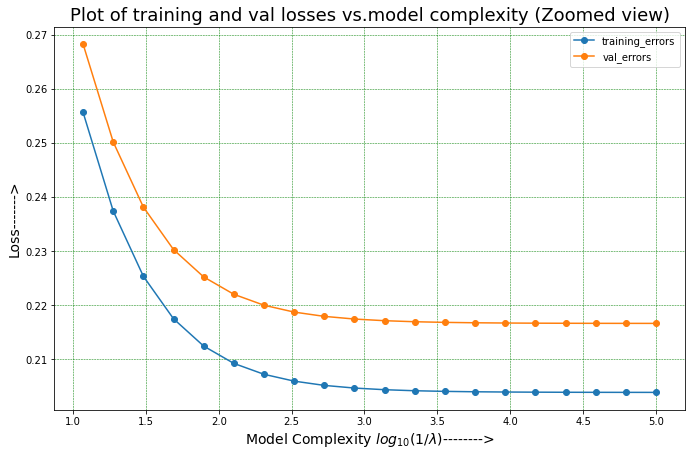

In [160]:
fig = plt.figure(figsize=(10,7)); # setting the figure size
  # plotting the training loss over the log10(λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity)[:20],train_loss_l2[:20],linestyle='solid',marker = 'o',label='training_errors')
  # plotting the validation loss over the log10(λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity)[:20],val_loss_l2[:20],linestyle='solid',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity $log_{10}(1/\lambda)$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
  # giving a title to the figure
plt.title("Plot of training and val losses vs.model complexity (Zoomed view)",fontsize="18")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();


> Clearly we can see that values of $log_{10}(\frac{1}{\lambda})$ between $1.5$ and $2$ are good values leading to sweet spot. 


#### Finding the values for optimal λ

> We will now create a dataframe containing the values of losses and weights for different values of λ to see the values in a better way.

In [161]:
# let's see the values of the losses at different values of λ by creating a dataframe
l2_model_df= pd.DataFrame({ 
                            "Lambdas": lamdas,
                            "Train_loss_final": train_loss_l2,
                            "Val_loss_final": val_loss_l2,
                            "Val_NRMSE": val_nrmse_l2,
                            "Weights": weights_l2
    
})
l2_model_df

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights
0,0.000010,0.203910,0.216654,0.463397,"[0.15553260955691847, 0.050233756557671726, 0...."
1,0.000016,0.203914,0.216659,0.463397,"[0.15553215291967937, 0.050234942464623976, 0...."
2,0.000026,0.203921,0.216665,0.463397,"[0.15553141766152748, 0.0502368521053914, 0.13..."
3,0.000042,0.203932,0.216676,0.463397,"[0.15553023382628892, 0.05023992717881592, 0.1..."
4,0.000067,0.203950,0.216694,0.463397,"[0.15552832786038653, 0.050244878986011716, 0...."
5,0.000108,0.203978,0.216723,0.463397,"[0.1555252595830359, 0.050252853038243145, 0.1..."
6,0.000174,0.204024,0.216768,0.463397,"[0.1555203209970806, 0.050265694245356485, 0.1..."
7,0.000281,0.204097,0.216842,0.463398,"[0.15551237413931646, 0.050286374265086954, 0...."
8,0.000452,0.204215,0.216961,0.463398,"[0.15549959202760158, 0.050319680486178575, 0...."
9,0.000728,0.204405,0.217151,0.463399,"[0.15547904682874933, 0.05037332761426522, 0.1..."


> Since our sweet spot contains the values of $log_{10}(\frac{1}{\lambda})$ between $1.5$ and $2$ (λ is between $10^{-2}$ and $10^{-1.5}$) we will see the values of loss at these λ values.

In [162]:
l2_model_df[(l2_model_df['Lambdas']<=10**(-1.5)) & (l2_model_df['Lambdas']>=10**(-2)) ] # filtering the df using the condition

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights
15,0.012690,0.212461,0.225234,0.463524,"[0.15463197183504257, 0.05271519518771265, 0.1..."
16,0.020434,0.217498,0.230281,0.463689,"[0.15412823867771044, 0.05424313558182946, 0.1..."


> So the best optimal value of **λ** is **0.012690** since they are producing low values of training loss and validation loss and lead to sweet spot. 

> Clearly the optimal values are at index 15 in the dataframe. This means all the optimal values are at index 15 in the respective lists `lamdas`, `train_loss`, `val_loss`, `val_nrmse`, `weights`.

In [163]:
# finding the weights and losses for the optimal value of λ
print("Best λ: {} ".format(lamdas[15]) )
print("Final Training loss:",train_loss_l2[15])
print("Final Validation loss:",val_loss_l2[15])
print("Final Validation NRMSE:",val_nrmse_l2[15])
print("Obtained Weights:",weights_l2[15],sep="\n")

Best λ: 0.01268961003167922 
Final Training loss: 0.21246051151358844
Final Validation loss: 0.2252343005869991
Final Validation NRMSE: 0.4635240771643194
Obtained Weights:
[ 1.54631972e-01  5.27151952e-02  1.19830533e-01 -4.00181199e-02
  5.76946682e-01  7.59305520e-02 -1.30036105e-01  8.51789178e-02
 -1.04877520e-01 -6.35145186e-02 -5.35488276e-02 -7.26265905e-02
 -2.21182466e-02  5.91558571e-02 -2.64714971e-03 -6.43748773e-03
 -1.21554434e-02 -3.90700301e-02 -6.41170205e-02  7.90005378e-02
  2.43357699e-02 -2.43461131e-04]


In [164]:
# let's see the optimal weights obtained for each feature
weights_df = pd.DataFrame({ "Features": list(train_df.columns[:-1]), # all the features
                            "Obtained_Weights": weights_l2[15][:-1] # weights excluding bias term
    
})
weights_df

,Features,Obtained_Weights
0,Present_Tmax,0.154632
1,Present_Tmin,0.052715
2,LDAPS_RHmin,0.119831
3,LDAPS_RHmax,-0.040018
4,LDAPS_Tmax_lapse,0.576947
5,LDAPS_Tmin_lapse,0.075931
6,LDAPS_WS,-0.130036
7,LDAPS_LH,0.085179
8,LDAPS_CC1,-0.104878
9,LDAPS_CC2,-0.063515


In [165]:
# let's see which features have more weight
weights_df.sort_values("Obtained_Weights",ascending=False)

,Features,Obtained_Weights
4,LDAPS_Tmax_lapse,0.576947
0,Present_Tmax,0.154632
2,LDAPS_RHmin,0.119831
7,LDAPS_LH,0.085179
19,Slope,0.079001
5,LDAPS_Tmin_lapse,0.075931
13,LDAPS_PPT2,0.059156
1,Present_Tmin,0.052715
20,Solar radiation,0.024336
14,LDAPS_PPT3,-0.002647


> Clearly the "Next_Tmax" target column is more dependent on the "LDAPS_Tmax_lapse", "Present_Tmax", "LDAPS_RHmin"	and less dependent on "LDAPS_CC4", "LDAPS_CC1","LDAPS_WS".

## Building L1 Model

In [166]:
def L1_model(X_train, t_train, X_val, t_val,lamda, max_iter, epsilon, lr):
 
  w = np.ones((X_train.shape[1]+1,)) # taking weights with dimensions = features of training dataset(X_train) and initialiasing with ones

  # calling the Gradient_Descent() function defined previously to optimise the loss
  w_final, train_loss_final, val_loss_final, val_NRMSE = Gradient_Descent (X_train, X_val, t_train, t_val, w, lamda, max_iter, 
                                                                           epsilon, lr,L1_Loss,L1_Gradient)

  return w_final, train_loss_final, val_loss_final, val_NRMSE

#### Training the L1 Model

In [167]:
lamdas = list(np.logspace(-5.0, 1, num=30))  # taking 30 values of λ between 10e-05 to 10e01 in powers of 10
lrs = 0.001                                  # choosing learning rate η
max_iter = 7000                              # choosing maximum number of iterations 
epsilon = 1e-10                              # choosing the tolerance between the previous and next loss
train_loss_l1 , val_loss_l1, val_nrmse_l1,weights_l1 = [],[],[],[] # for storing the values of losses and weights for different values of λ

for lamda in lamdas: # iterating over each λ value
    # finding the values obtained after training the model
    w_final, train_loss_final, val_loss_final, val_NRMSE = L1_model(X_train, t_train, X_val, t_val,lamda, max_iter, epsilon, lrs)
    # storing the losses and weights for plotting
    train_loss_l1.append(train_loss_final)
    val_loss_l1.append(val_loss_final)
    val_nrmse_l1.append(val_NRMSE)
    weights_l1.append(w_final)
    

#### Observations and Results of Training

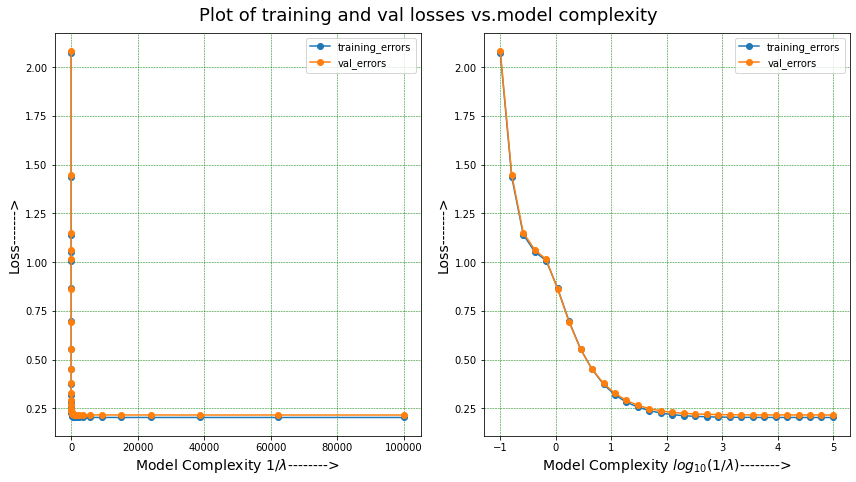

In [168]:
fig = plt.figure(figsize=(12,7)); # setting the figure size
model_complexity = [1/lamda for lamda in lamdas]  # taking the list to plot model complexity

plt.subplot(121)
  # plotting the training loss over the 1/λ values
plt.plot(model_complexity,train_loss_l1,linestyle='solid',marker = 'o',label='training_errors')
  # plotting the validation loss over the 1/λ values
plt.plot(model_complexity,val_loss_l1,linestyle='solid',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity 1/$\lambda$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplot(122)
  # plotting the training loss over the log10(1/λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity),train_loss_l1,linestyle='solid',marker = 'o',label='training_errors')
  # plotting the validation loss over the log10(1/λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity),val_loss_l1,linestyle='solid',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity $log_{10}(1/\lambda)$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14") 
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

  # giving a common title to the figure
plt.suptitle("Plot of training and val losses vs.model complexity",fontsize="18")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();


> - In L1- Linear Regression, as the value of **λ increases**, the model becomes too simple and thus, it results in **Underfitting**.So as a result the training and validation losses will be very high at low values of λ's.
- And similarly, as the value of **λ decreases**, the model becomes too complex and thus, it results in **Overfitting**.
- This is clearly evident from the plots above, where there's a high loss at high values of λ (1/λ will be small) and keeps decresing as the λ increase. 
- But there's a sweet spot where the value of λ will be optimal and thus produces good results. This sweet spot can be seen in the plot in the range around $0$ to $2$ for values of $log_{10}(\frac{1}{\lambda})$ values i.e in range of $0.01$ to $1$ for values of λ.

> So to find the best value, let's look into the zoomed version of the plot.

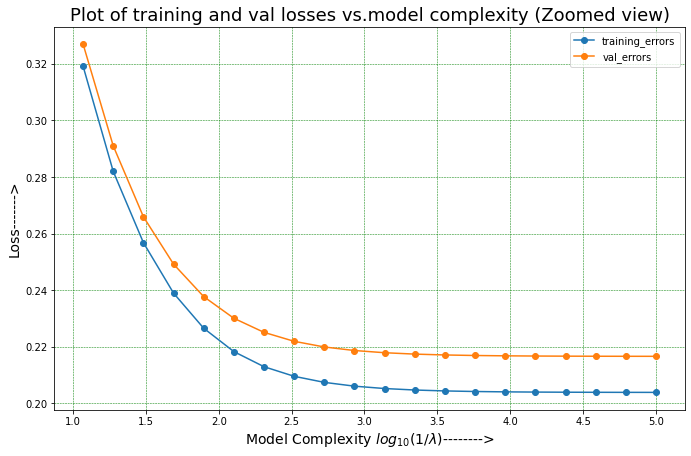

In [169]:
fig = plt.figure(figsize=(10,7)); # setting the figure size
  # plotting the training loss over the log10(λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity)[:20],train_loss_l1[:20],linestyle='solid',marker = 'o',label='training_errors')
  # plotting the validation loss over the log10(λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity)[:20],val_loss_l1[:20],linestyle='solid',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity $log_{10}(1/\lambda)$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

  # giving a title to the figure
plt.title("Plot of training and val losses vs.model complexity (Zoomed view)",fontsize="18")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();


> Clearly we can see that values of $log_{10}(\frac{1}{\lambda})$ between $2$ and $2.5$ are good values leading to sweet spot. 


#### Finding the values for optimal λ

> We will now create a dataframe containing the values of losses and weights for different values of λ to see the values in a better way.

In [170]:
# let's see the values of the losses at different values of λ by creating a dataframe
l1_model_df= pd.DataFrame({ 
                            "Lambdas": lamdas,
                            "Train_loss_final": train_loss_l1,
                            "Val_loss_final": val_loss_l1,
                            "Val_NRMSE": val_nrmse_l1,
                            "Weights": weights_l1
    
})
l1_model_df

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights
0,0.000010,0.203922,0.216665,0.463396,"[0.15553747578325117, 0.05023150160979697, 0.1..."
1,0.000016,0.203934,0.216676,0.463395,"[0.1555399891574612, 0.05023131229045601, 0.13..."
2,0.000026,0.203953,0.216694,0.463394,"[0.1555440352849938, 0.050231006955891944, 0.1..."
3,0.000042,0.203983,0.216722,0.463393,"[0.1555505518153502, 0.05023051491568823, 0.13..."
4,0.000067,0.204031,0.216767,0.463390,"[0.15556104338446186, 0.050229715138600924, 0...."
5,0.000108,0.204109,0.216840,0.463386,"[0.1555779326611754, 0.05022843562041843, 0.13..."
6,0.000174,0.204235,0.216957,0.463380,"[0.15560513677442234, 0.05022634602308181, 0.1..."
7,0.000281,0.204437,0.217146,0.463370,"[0.1556489156461533, 0.0502229987090712, 0.134..."
8,0.000452,0.204762,0.217449,0.463354,"[0.15571939078545113, 0.05021754037217281, 0.1..."
9,0.000728,0.205284,0.217937,0.463330,"[0.15583284640851228, 0.05020855446637073, 0.1..."


> Since our sweet spot contains the values of $log_{10}(\frac{1}{\lambda})$ between $2$ and $2.5$ (λ is between $10^{-2.5}$ and $10^{-2}$) we will see the values of loss at these λ values.

In [171]:
l1_model_df[(l1_model_df['Lambdas']<=10**(-2)) & (l1_model_df['Lambdas']>=10**(-2.5)) ] # filtering the df using the condition

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights
13,0.004894,0.213000,0.225137,0.463123,"[0.15753786029436354, 0.050055035726919106, 0...."
14,0.007880,0.218336,0.230113,0.463159,"[0.15875186556380474, 0.049927105060332815, 0...."


> So the best optimal value of **λ** is **0.004894** since they are producing low values of training loss and validation loss and lead to sweet spot. 

> Clearly the optimal values are at index 13 in the dataframe. This means all the optimal values are at index 13 in the respective lists `lamdas`, `train_loss`, `val_loss`, `val_nrmse`, `weights`.

In [172]:
# finding the weights and losses for the optimal value of λ
print("Best λ: {} ".format(lamdas[13]) )
print("Final Training loss:",train_loss_l1[13])
print("Final Validation loss:",val_loss_l1[13])
print("Final Validation NRMSE:",val_nrmse_l1[13])
print("Obtained Weights:",weights_l1[13],sep="\n")

Best λ: 0.004893900918477494 
Final Training loss: 0.21299978017329352
Final Validation loss: 0.22513699007648014
Final Validation NRMSE: 0.4631232139902512
Obtained Weights:
[ 1.57537860e-01  5.00550357e-02  1.20462462e-01 -3.40941909e-02
  5.98612909e-01  6.22394503e-02 -1.26910093e-01  8.16250049e-02
 -1.03199535e-01 -5.57131669e-02 -4.79073205e-02 -7.25687106e-02
 -2.01591944e-02  5.34961135e-02 -1.71835018e-03 -5.09953737e-03
 -1.03825304e-02 -3.95279827e-02 -5.55932655e-02  7.05040621e-02
  1.95396236e-02 -2.94505939e-04]


In [173]:
# let's see the optimal weights obtained for each feature
weights_df = pd.DataFrame({ "Features": list(train_df.columns[:-1]), # all the features
                            "Obtained_Weights": weights_l1[13][:-1] # weights excluding bias term
    
})
weights_df

,Features,Obtained_Weights
0,Present_Tmax,0.157538
1,Present_Tmin,0.050055
2,LDAPS_RHmin,0.120462
3,LDAPS_RHmax,-0.034094
4,LDAPS_Tmax_lapse,0.598613
5,LDAPS_Tmin_lapse,0.062239
6,LDAPS_WS,-0.126910
7,LDAPS_LH,0.081625
8,LDAPS_CC1,-0.103200
9,LDAPS_CC2,-0.055713


In [174]:
# let's see which features have more weight
weights_df.sort_values("Obtained_Weights",ascending=False)

,Features,Obtained_Weights
4,LDAPS_Tmax_lapse,0.598613
0,Present_Tmax,0.157538
2,LDAPS_RHmin,0.120462
7,LDAPS_LH,0.081625
19,Slope,0.070504
5,LDAPS_Tmin_lapse,0.062239
13,LDAPS_PPT2,0.053496
1,Present_Tmin,0.050055
20,Solar radiation,0.019540
14,LDAPS_PPT3,-0.001718


> Clearly the "Next_Tmax" target column is more dependent on the "LDAPS_Tmax_lapse", "Present_Tmax", "LDAPS_RHmin"	and less dependent on "LDAPS_CC4", "LDAPS_CC1","LDAPS_WS".

## Pseudo-Inverse Method

In [175]:
def pinv_model(X_train, t_train, X_val, t_val,lamda):
 
  w =  Pseudo_Inverse (X_train, t_train, lamda)         # finding the weights by calling the Pseudo_Inverse() function defined previously
  train_loss_final = MSE_Loss (X_train, t_train, w, lamda =0) # finding the training loss with the optimised weights 
  val_loss_final = MSE_Loss (X_val, t_val, w, lamda =0)       # finding the validation loss with the optimised weights 
  val_NRMSE = NRMSE_Metric (X_val, t_val, w, lamda=0)         # finding the validation NRMSE loss with the optimised weights

  return w, train_loss_final, val_loss_final, val_NRMSE

### Training the model

In [176]:
lamdas = list(np.logspace(-5.0, 1, num=30))  # taking 30 values of λ between 10e-05 to 10e01 in powers of 10
weights_pinv = []                                          # for storing the values of weights for different values of λ
train_loss_pinv , val_loss_pinv, val_nrmse_pinv = [],[],[] # for storing the values of losses for different values of λ

for lamda in lamdas: # iterating over each λ
    # finding the values obtained after training the model
  w, train_loss_final, val_loss_final, val_NRMSE = pinv_model(X_train, t_train, X_val, t_val, lamda)
  # storing the losses and weights for plotting
  weights_pinv.append(w)
  train_loss_pinv.append(train_loss_final)
  val_loss_pinv.append(val_loss_final)
  val_nrmse_pinv.append(val_NRMSE)  


### Observations and Results of Training

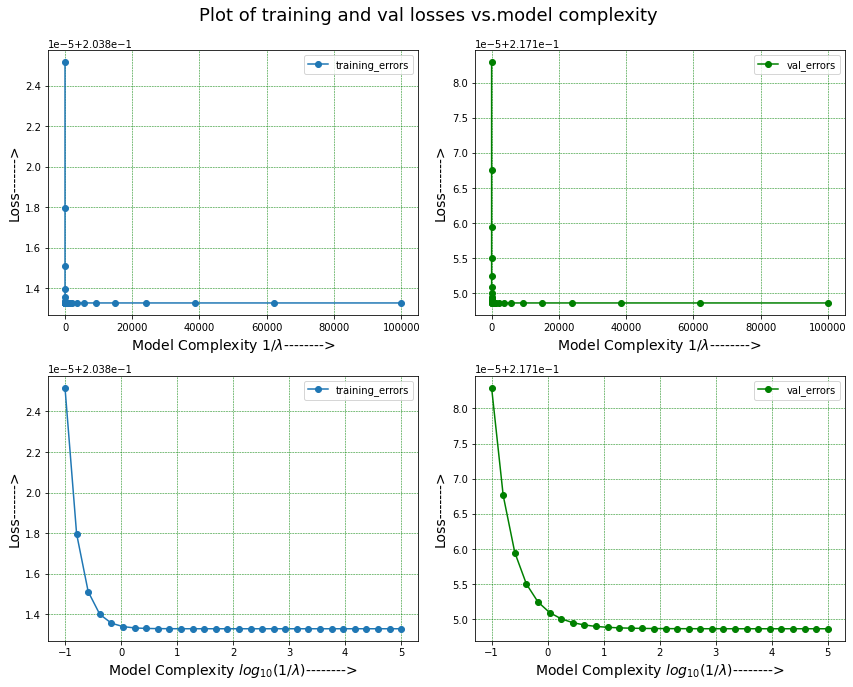

In [177]:
fig = plt.figure(figsize=(12,10)); # setting the figure size
model_complexity = [1/lamda for lamda in lamdas]  # taking the list to plot model complexity

plt.subplot(221)
  # plotting the training loss over the 1/λ values 
plt.plot(model_complexity,train_loss_pinv,linestyle='solid',marker = 'o',label='training_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity 1/$\lambda$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplot(222)
  # plotting the validation loss over the 1/λ values 
plt.plot(model_complexity,val_loss_pinv,linestyle='solid',marker = 'o',color='g',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity 1/$\lambda$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14")
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplot(223)
  # plotting the training loss over the log10(1/λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity),train_loss_pinv,linestyle='solid',marker = 'o',label='training_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity $log_{10}(1/\lambda)$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14") 
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplot(224)
  # plotting the validation loss over the log10(1/λ) values (since our values are in powers of 10 )
plt.plot(np.log10(model_complexity),val_loss_pinv,linestyle='solid',color='g',marker = 'o',label='val_errors')
  # labelling the x-axis
plt.xlabel("Model Complexity $log_{10}(1/\lambda)$-------->",fontsize="14")
  # labelling the y-axis
plt.ylabel("Loss------->",fontsize="14") 
plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
  # giving a common title to the figure
plt.suptitle("Plot of training and val losses vs.model complexity",fontsize="18")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

> The  L2- Linear Regression has only one closed-form solution which is given by $w = (X^{T}X+ λI)^{-1} X^{T}t            $

- There's a sweet spot where the value of λ will be optimal and thus produces good results. This sweet spot can be seen in the plot in the range around $-1$ to $2$ for values of $log_{10}(\frac{1}{\lambda})$ values (in the training loss plot) i.e in range of $0.01$ to $10$ for values of λ.


### Finding the values for optimal λ

> We will now create a dataframe containing the values of losses and weights for different values of λ to see the values in a better way.

In [178]:
# let's see the values of the losses at different values of λ by creating a dataframe
pinv_df= pd.DataFrame({ 
                            "Lambdas": lamdas,
                            "Train_loss_final": train_loss_pinv,
                            "Val_loss_final": val_loss_pinv,
                            "Val_NRMSE": val_nrmse_pinv,                       
                            "Weights _Pinv":weights_pinv,
                            
    
})
pinv_df

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights _Pinv
0,0.000010,0.203813,0.217149,0.463932,"[0.15381528895914742, 0.047506251258497334, 0...."
1,0.000016,0.203813,0.217149,0.463932,"[0.15381528855939403, 0.047506251430729105, 0...."
2,0.000026,0.203813,0.217149,0.463932,"[0.1538152879156897, 0.047506251708065356, 0.1..."
3,0.000042,0.203813,0.217149,0.463932,"[0.1538152868791558, 0.04750625215464791, 0.14..."
4,0.000067,0.203813,0.217149,0.463932,"[0.15381528521006338, 0.04750625287376715, 0.1..."
5,0.000108,0.203813,0.217149,0.463932,"[0.15381528252238777, 0.0475062540317363, 0.14..."
6,0.000174,0.203813,0.217149,0.463932,"[0.15381527819452984, 0.0475062558963713, 0.14..."
7,0.000281,0.203813,0.217149,0.463932,"[0.1538152712255505, 0.04750625889892826, 0.14..."
8,0.000452,0.203813,0.217149,0.463932,"[0.15381526000368465, 0.04750626373383694, 0.1..."
9,0.000728,0.203813,0.217149,0.463932,"[0.15381524193357946, 0.04750627151933214, 0.1..."


In [179]:
# Now let's check how the weights obtained in L2_model and the pseudo-inv weights differ.
# compute the mse between the weights_l2, weights_pinv

weights_mse=[]
for i in range(len(lamdas)): # for each lambda there's a weight
  weights_mse.append(np.mean(np.square(np.array(weights_pinv)[i] - np.array(weights_l2[i]))))

# let's add this weights_mse in the pinv_df
pinv_df.insert(loc=4, column='Weights_MSE', value=weights_mse) # insert a column of weights_mse after Val_NRMSE column

pinv_df

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights_MSE,Weights _Pinv
0,0.000010,0.203813,0.217149,0.463932,0.000023,"[0.15381528895914742, 0.047506251258497334, 0...."
1,0.000016,0.203813,0.217149,0.463932,0.000023,"[0.15381528855939403, 0.047506251430729105, 0...."
2,0.000026,0.203813,0.217149,0.463932,0.000023,"[0.1538152879156897, 0.047506251708065356, 0.1..."
3,0.000042,0.203813,0.217149,0.463932,0.000023,"[0.1538152868791558, 0.04750625215464791, 0.14..."
4,0.000067,0.203813,0.217149,0.463932,0.000023,"[0.15381528521006338, 0.04750625287376715, 0.1..."
5,0.000108,0.203813,0.217149,0.463932,0.000023,"[0.15381528252238777, 0.0475062540317363, 0.14..."
6,0.000174,0.203813,0.217149,0.463932,0.000023,"[0.15381527819452984, 0.0475062558963713, 0.14..."
7,0.000281,0.203813,0.217149,0.463932,0.000023,"[0.1538152712255505, 0.04750625889892826, 0.14..."
8,0.000452,0.203813,0.217149,0.463932,0.000023,"[0.15381526000368465, 0.04750626373383694, 0.1..."
9,0.000728,0.203813,0.217149,0.463932,0.000023,"[0.15381524193357946, 0.04750627151933214, 0.1..."


> Since our sweet spot contains the values of $log_{10}(\frac{1}{\lambda})$ between $-1$ and $2$ (λ is between $10^{-2}$ and $10^{1}$) we will see the values of loss at these λ values.

In [180]:
pinv_df[(pinv_df['Lambdas']<=10**(1)) & (pinv_df['Lambdas']>=10**(-2)) ] # filtering the df using the condition

,Lambdas,Train_loss_final,Val_loss_final,Val_NRMSE,Weights_MSE,Weights _Pinv
15,0.012690,0.203813,0.217149,0.463932,0.000064,"[0.1538144584348883, 0.047506609138654066, 0.1..."
16,0.020434,0.203813,0.217149,0.463932,0.000134,"[0.15381395125050917, 0.04750682774212703, 0.1..."
17,0.032903,0.203813,0.217149,0.463932,0.000310,"[0.1538131346348405, 0.047507179799688735, 0.1..."
18,0.052983,0.203813,0.217149,0.463932,0.000719,"[0.1538118198876173, 0.04750774683083357, 0.14..."
19,0.085317,0.203813,0.217149,0.463933,0.001587,"[0.15380970336515631, 0.047508660226748316, 0...."
20,0.137382,0.203813,0.217149,0.463933,0.003127,"[0.15380629667401013, 0.047510131881437226, 0...."
21,0.221222,0.203813,0.217149,0.463933,0.005176,"[0.15380081480378632, 0.04751250382787689, 0.1..."
22,0.356225,0.203813,0.217150,0.463933,0.007169,"[0.15379199738673122, 0.04751632897146372, 0.1..."
23,0.573615,0.203813,0.217150,0.463934,0.008980,"[0.15377782448178123, 0.047522503171870636, 0...."
24,0.923671,0.203813,0.217151,0.463935,0.010906,"[0.1537550681954676, 0.04753248327712996, 0.14..."


> So the best optimal value of **λ** is **0.012690** since they are producing low values of training loss and validation loss and lead to sweet spot. 

> Clearly the optimal values are at index 15 in the dataframe. This means all the optimal values are at index 15 in the respective lists `lamdas`, `train_loss`, `val_loss`, `val_nrmse`, `weights`,`weights_mse`.

In [181]:
# finding the weights and losses for the optimal value of λ
print("Best λ: {} ".format(lamdas[15]) )
print("Final Training loss:",train_loss_pinv[15])
print("Final Validation loss:",val_loss_pinv[15])
print("Final Validation NRMSE:",val_nrmse_pinv[15])
print("Obtained Weights:",weights_pinv[15],sep="\n")

Best λ: 0.01268961003167922 
Final Training loss: 0.20381328287347333
Final Validation loss: 0.21714866549371895
Final Validation NRMSE: 0.46393237621884975
Obtained Weights:
[ 1.53814458e-01  4.75066091e-02  1.44672681e-01 -4.84579188e-02
  5.95603060e-01  6.83694270e-02 -1.31365422e-01  8.62136857e-02
 -1.02350480e-01 -6.79573686e-02 -5.92113341e-02 -7.16618228e-02
 -2.22174643e-02  6.02521356e-02 -2.94586774e-03 -5.73514560e-03
 -1.35131240e-02 -3.89538600e-02 -7.46333943e-02  8.94296756e-02
  2.26536124e-02 -2.14238630e-04]


> So the best optimal value of **λ** is **0.012690**  and matches with the optimal value of λ obtained in L2 model.

## Observations and Conclusions

> Let's compare the three models and find the best model.

In [182]:
print("------------------------L2_MODEL------------------------")
print("Best λ: {} ".format(lamdas[15]) )
print("Final Training loss:",train_loss_l2[15])
print("Final Validation loss:",val_loss_l2[15])
print("Final Validation NRMSE:",val_nrmse_l2[15])

print("========================================================")
print("------------------------L1_MODEL------------------------")
print("Best λ: {} ".format(lamdas[13]) )
print("Final Training loss:",train_loss_l1[13])
print("Final Validation loss:",val_loss_l1[13])
print("Final Validation NRMSE:",val_nrmse_l1[13])
print("========================================================")
print("------------------------PINV_MODEL------------------------")
# finding the weights for the optimal value of λ
print("Best λ: {} ".format(lamdas[15]) )
print("Final Training loss:",train_loss_pinv[15])
print("Final Validation loss:",val_loss_pinv[15])
print("Final Validation NRMSE:",val_nrmse_pinv[15])
print("========================================================")
print("Obtained Weights with L2 model:",weights_l2[15],sep="\n")
print("----------------------------------------------------------")
print("Obtained Weights using Pseudo-inv method:",weights_pinv[15],sep="\n")
print("----------------------------------------------------------")
print("Weights MSE between weights_l2 and weights_pinv:",weights_mse[15])

------------------------L2_MODEL------------------------
Best λ: 0.01268961003167922 
Final Training loss: 0.21246051151358844
Final Validation loss: 0.2252343005869991
Final Validation NRMSE: 0.4635240771643194
------------------------L1_MODEL------------------------
Best λ: 0.004893900918477494 
Final Training loss: 0.21299978017329352
Final Validation loss: 0.22513699007648014
Final Validation NRMSE: 0.4631232139902512
------------------------PINV_MODEL------------------------
Best λ: 0.01268961003167922 
Final Training loss: 0.20381328287347333
Final Validation loss: 0.21714866549371895
Final Validation NRMSE: 0.46393237621884975
Obtained Weights with L2 model:
[ 1.54631972e-01  5.27151952e-02  1.19830533e-01 -4.00181199e-02
  5.76946682e-01  7.59305520e-02 -1.30036105e-01  8.51789178e-02
 -1.04877520e-01 -6.35145186e-02 -5.35488276e-02 -7.26265905e-02
 -2.21182466e-02  5.91558571e-02 -2.64714971e-03 -6.43748773e-03
 -1.21554434e-02 -3.90700301e-02 -6.41170205e-02  7.90005378e-02
 

- Thus we can see that L2-Model proved to be better when compared to L1-Model. 
- The weights obtained in the L2 model are very close to the weights obtained in Pseudo-inverse method (this is the closed-form solution, so we can consider these as actual weights).
- The Mean squared error(MSE) of the error between the two weights is very low (0.0000064054) and our model turned out to be good.
- The training and validation mse loss are minimum and the model is *generalized*. So it can be used to find the predictions on new dataset. 
- Thus we find the predictions on new data using the **L2-Model** with 
  **λ: 0.01268961003167922**

## Predictions on Test data

In [183]:
# reading the dataset using Pandas library
test_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv")

In [184]:
# checking the dataframe
test_df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,4.236132e-01,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,4.317073e-01,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,4.105748e-01,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,3.978184e-01,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,4.479975e-01,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.000000,37.5507,127.040,26.2980,0.5721,4456.024414
1502,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.000000,37.5102,127.086,21.9668,0.1332,4441.803711
1503,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965
1504,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535


> Since the model is trained with normalized data and the weights obtained are also normalized, we will predict the targets by normalizing the dataset. We need to normalize the test data using the training mean and std.

In [185]:
# removing the target column so that we can obtain the mean and std of the features 
df = train_df.drop('Next_Tmax',axis=1)
df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,23.9,19.8,82.235489,89.673126,20.718329,16.868849,14.908830,86.993173,0.759186,0.862202,0.898900,0.723556,0.348464,2.153618,5.217196,1.139555,37.5507,127.040,26.2980,0.5721,4416.057129
6078,24.4,19.7,79.676888,90.329170,20.957463,17.063541,13.844681,95.444412,0.787284,0.901921,0.920533,0.667988,0.297791,1.894275,5.737044,1.002951,37.5102,127.086,21.9668,0.1332,4401.705566
6079,24.8,19.9,82.331352,90.905838,20.804890,16.927768,14.502989,85.178889,0.769457,0.949824,0.966691,0.811649,0.413629,1.465975,4.861343,0.750402,37.5372,126.891,15.5876,0.1554,4403.272949
6080,24.8,19.9,79.719048,89.949905,21.023026,16.951494,14.510165,85.830552,0.760021,0.947244,0.955192,0.784297,0.403947,1.534074,5.315514,0.815112,37.5237,126.909,17.2956,0.2223,4398.263672


In [186]:
# Normalizing the dataset by the mean and std of the train dataset

    # df.mean(axis=0) computes the mean along rows i.e returns a row vector of means of each column of df
    # df.std(axis=0) computes the standard deviation along rows i.e returns a row vector of std_dev of each column of df
mean = df.mean(axis=0) 
std = df.std(axis=0)

test_norm_df = (test_df - mean)/std  # normalizing the test df
test_norm_df                         # checking the normalized dataset

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.644391,-1.338776,0.203758,1.272477,-0.970546,-1.132042,-0.329429,0.389644,-0.655522,-0.180874,0.490525,2.211204,-0.308684,-0.277869,-0.240897,-0.200201,1.187077,-0.007944,2.774473,1.111158,1.506702
1,0.168887,-0.880760,-0.304429,0.145149,-0.187851,-0.200794,-0.417379,-0.242088,-0.671966,-0.160822,0.523562,2.107634,-0.308684,-0.277869,-0.240897,-0.194976,1.187077,0.509002,-0.315498,-0.543769,1.220113
2,0.135000,-0.256194,-0.586619,-0.408389,0.028328,0.047825,-0.386204,-1.450114,-0.644417,-0.198658,0.437306,2.142687,-0.308684,-0.277869,-0.240897,-0.212873,0.651523,0.836821,-0.526734,-0.724500,1.206763
3,0.304433,-0.464382,0.234444,1.407253,-0.475521,-0.892969,-0.170490,1.291451,-0.698175,-0.197868,0.385238,1.968788,-0.308684,-0.277869,-0.240897,-0.186526,1.988424,0.382917,-0.297914,0.928824,1.191479
4,0.406093,-0.547658,-0.070178,0.594998,-0.560525,-0.553932,-0.399057,1.278307,-0.747499,-0.237432,0.590054,2.132329,-0.308684,-0.277869,-0.240897,-0.210492,0.117953,1.807670,-0.494812,-0.550036,1.197479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-2.270947,-2.213169,-2.167256,-1.402266,-0.621005,-2.225389,-0.238228,-1.596174,-1.202350,-1.247145,-1.238537,-1.125967,-0.308684,-0.277869,-0.240897,-0.222618,0.117953,0.609869,-0.655974,-0.501501,-2.057295
1502,-2.474266,-2.379720,-1.793301,-0.659924,-1.002757,-2.437061,-0.609023,0.594411,-1.151102,-1.268948,-1.238535,-1.073042,-0.308684,-0.277869,-0.240897,-0.222618,-0.685378,1.189857,-0.735839,-0.821351,-2.090273
1503,-2.203173,-2.504634,-2.025285,-1.319059,-1.124342,-2.020777,-0.439942,0.289727,-1.288783,-1.050877,-1.238537,-1.143399,-0.308684,-0.277869,-0.240897,-0.222618,-0.149824,-1.268787,-0.853469,-0.805173,-2.086770
1504,-2.203173,-2.254807,-2.212107,-1.534418,-0.897553,-2.039028,-0.265059,-0.459776,-1.266711,-1.074308,-1.238537,-1.143399,-0.308684,-0.277869,-0.240897,-0.222618,-0.417601,-1.041835,-0.821974,-0.756419,-2.098227


>Let's predict the target column by using the weights obtained in L2-model for best λ.

In [187]:
weights = np.array(weights_l2[16]) # converting weights as numpy array
X_test = np.array(test_norm_df)    # creating testing array

In [188]:
X_test.shape # checking the shape of testing array

(1506, 21)

In [189]:
weights.shape # checking the shape of weights

(22,)

In [190]:
y_pred = Prediction (X_test, weights)  # finding the predicted column values using Prediction() function defined previously

In [191]:
y_pred # checking the predicted values

array([-0.94065312, -0.281559  , -0.23218057, ..., -1.03447627,
       -0.99843085, -1.01721612])

In [192]:
y = (y_pred * train_df['Next_Tmax'].std())+ train_df['Next_Tmax'].mean() # denormalizing the predicted values using the train data mean, std

In [197]:
y # check predicted values(denormalized)

array([27.3898259 , 29.43106112, 29.58398766, ..., 27.09925264,
       27.21088646, 27.15270787])

In [194]:
# adding the predicted target column to the normalized dataset 
test_df['Next_Tmax'] = y
test_df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,4.236132e-01,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996,27.389826
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,4.317073e-01,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500,29.431061
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,4.105748e-01,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664,29.583988
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,3.978184e-01,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844,29.625919
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,4.479975e-01,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246,29.218531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.000000,37.5507,127.040,26.2980,0.5721,4456.024414,27.136400
1502,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.000000,37.5102,127.086,21.9668,0.1332,4441.803711,26.928257
1503,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965,27.099253
1504,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535,27.210886


In [195]:
# saving this dataset as a csv file
#test_norm_df.to_csv('213070015_213079003_1.csv', index=False)

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): None
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 

https://www.coursera.org/lecture/predictive-modeling-model-fitting-regression-analysis/model-generalization-ZBgh2

https://xavierbourretsicotte.github.io/intro_ridge.html

https://www.analyticssteps.com/blogs/l2-and-l1-regularization-machine-learning

https://www.youtube.com/channel/UCbdAZq799T9mxzRyGz3XYkA/playlists